<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [2]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [52]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [4]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [5]:
boston_df=pd.read_csv(boston_url)
boston_df

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [13]:
## 'The following describes the dataset variables:
##  CRIM - per capita crime rate by town
##  ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
##  INDUS - proportion of non-retail business acres per town.
##  CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
##  NOX - nitric oxides concentration (parts per 10 million)
##  RM - average number of rooms per dwelling
##  AGE - proportion of owner-occupied units built prior to 1940
##  DIS - weighted distances to five Boston employment centres
##  RAD - index of accessibility to radial highways
##  TAX - full-value property-tax rate per $10,000
##  PTRATIO - pupil-teacher ratio by town
##  LSTAT - % lower status of the population
##  MEDV - Median value of owner-occupied homes in $1000's')

<AxesSubplot:>

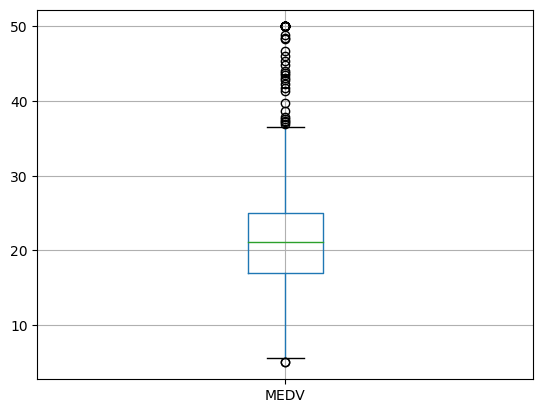

In [6]:
boston_df.boxplot('MEDV')

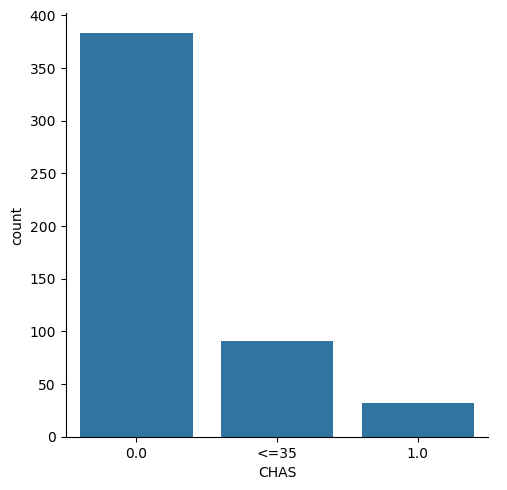

In [43]:
bar = sns.catplot(x='CHAS', data=boston_df, kind='count')
pyplot.show()

<AxesSubplot:title={'center':'MEDV'}, xlabel='age_group'>

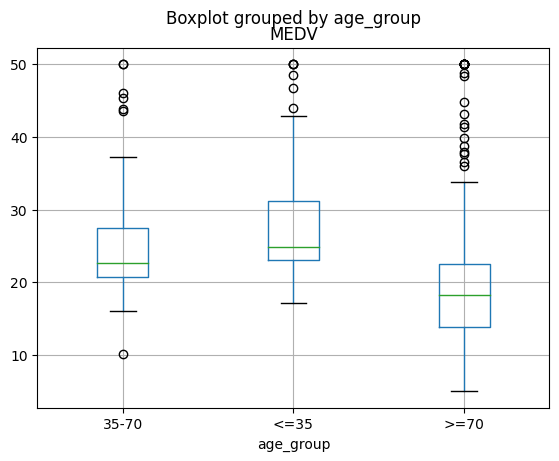

In [31]:
boston_df['AGE']
boston_df.loc[ (boston_df['AGE'] <= 35), 'age_group'] = '<=35'
boston_df.loc[ (boston_df['AGE'] > 35) & (boston_df['AGE'] < 70), 'age_group'] = '35-70'
boston_df.loc[ (boston_df['AGE'] >= 70), 'age_group'] = '>=70'

boston_df

boston_df.boxplot('MEDV', 'age_group')

<AxesSubplot:>

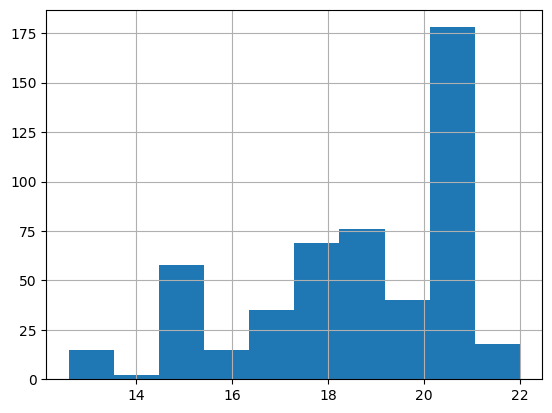

In [8]:
boston_df['PTRATIO'].hist()

In [20]:
# Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

print ('H0 - There is no significant difference in median value of houses bounded by the Charles river')

r = scipy.stats.ttest_ind(boston_df['CHAS'], boston_df['CHAS'].median())
print(r)
alpha = 0.05
if r.pvalue < alpha:
    print("Reject the null hypothesis; there is a significant difference in median value of houses bounded by the Charles river")
else:
    print("Fail to reject the null hypothesis; there is no significant difference in median value of houses bounded by the Charles river")

H0 - There is no significant difference in median value of houses bounded by the Charles river
TtestResult(statistic=0.27206036601764705, pvalue=0.7856867970708743, df=505.0)
Fail to reject the null hypothesis; there is no significant difference in median value of houses bounded by the Charles river


In [35]:
# Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

a = boston_df[boston_df['age_group'] == '<=35']['MEDV']
b = boston_df[boston_df['age_group'] == '35-70']['MEDV']
c = boston_df[boston_df['age_group'] == '>=70']['MEDV']

print ('H0 = There is no difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)')
r = scipy.stats.f_oneway(a, b, c)
print(r)
if r.pvalue < alpha:
    print("Reject the null hypothesis; there is a significant difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)")
else:
    print("Fail to reject the null hypothesis; there is no significant difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)")

H0 = There is no difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)
F_onewayResult(statistic=36.40764999196599, pvalue=1.7105011022702984e-15)
Reject the null hypothesis; there is a significant difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)


In [37]:
# Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

print('H0 = There is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town')
r = scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])
print(r)
if r.pvalue < alpha:
    print("Reject the null hypothesis; There exists a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town")
else:
    print("Fail to reject the null hypothesis; There is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town")

H0 = There is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town
PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)
Reject the null hypothesis; There exists a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town


In [54]:
# What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)
from statsmodels.formula.api import ols
lm = ols('DIS ~ age_group', data = boston_df).fit()
table= sm.stats.anova_lm(lm)
print(table)

              df       sum_sq     mean_sq           F        PR(>F)
age_group    2.0  1112.474663  556.237331  248.323988  9.611803e-76
Residual   503.0  1126.702981    2.239966         NaN           NaN
